In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import math
%matplotlib inline 
import gzip
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,IncrementalPCA
f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 300
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

(28, 28, 1)


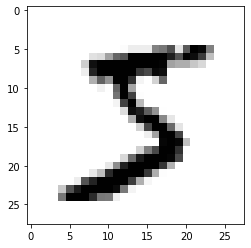

In [2]:
image = np.asarray(data[0])
print(image.shape)
plt.imshow(image,cmap='gray_r')
plt.show()

In [3]:
data[0].shape

(28, 28, 1)

In [4]:
data.shape

(300, 28, 28, 1)

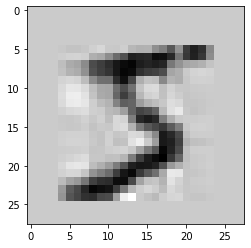

In [5]:
#compressing a single image from a dataset
C=data[0,:,:,0]
U, D, Vt = np.linalg.svd(C)
cmpimg = np.matrix(U[:, :5]) * np.diag(D[:5]) * np.matrix(Vt[:5,:])
plt.imshow(cmpimg,cmap='gray_r')

<Figure size 144x144 with 0 Axes>

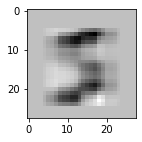

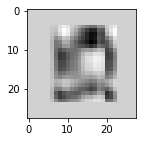

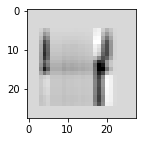

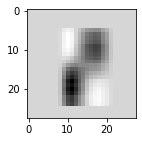

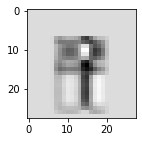

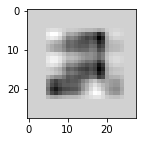

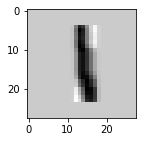

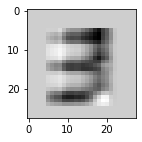

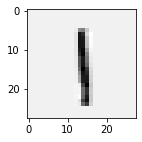

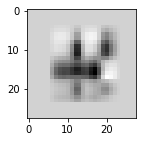

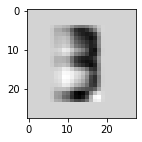

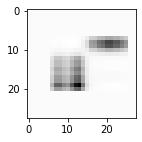

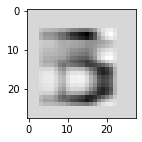

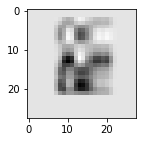

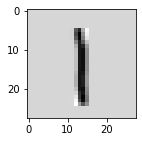

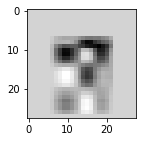

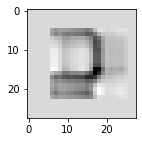

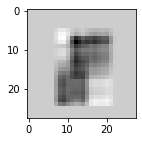

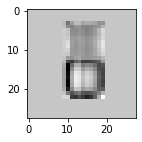

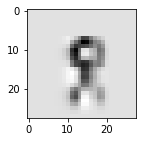

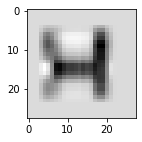

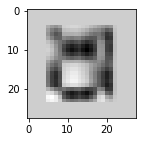

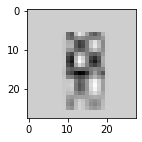

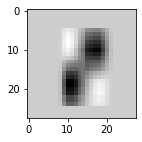

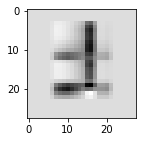

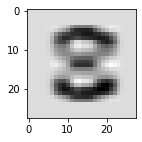

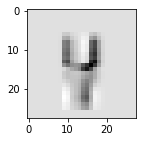

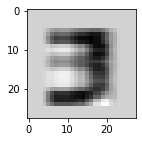

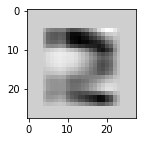

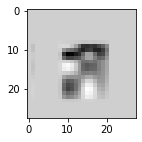

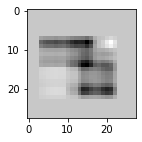

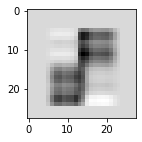

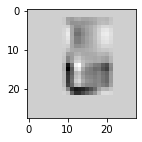

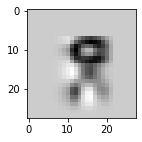

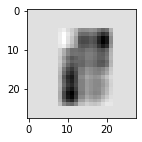

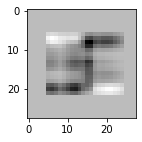

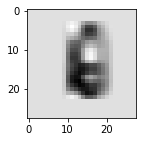

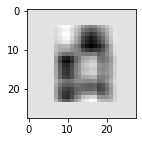

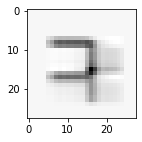

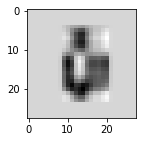

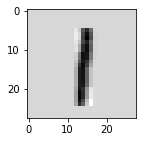

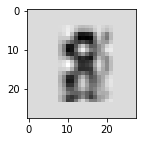

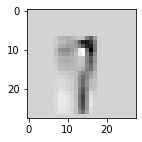

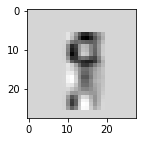

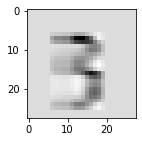

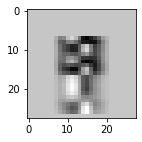

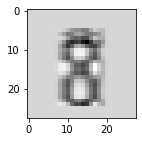

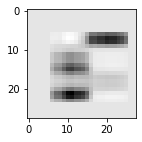

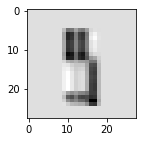

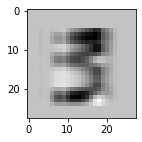

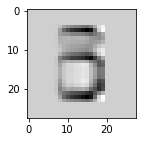

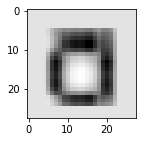

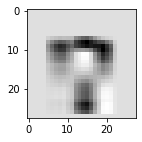

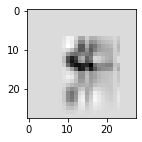

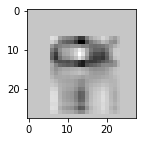

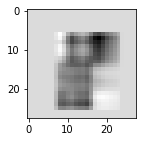

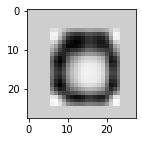

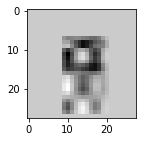

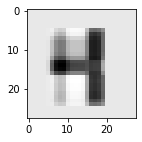

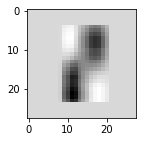

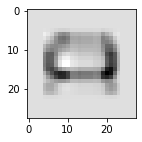

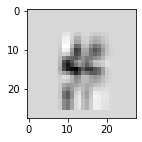

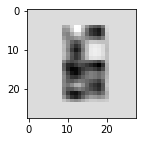

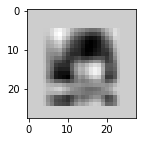

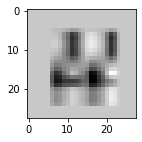

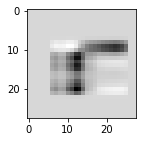

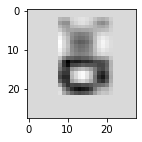

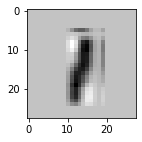

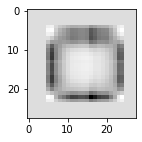

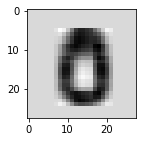

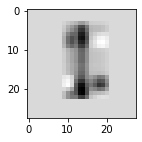

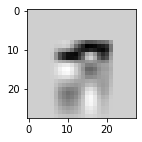

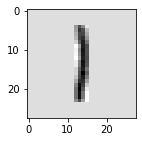

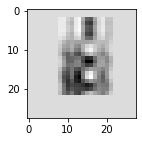

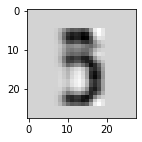

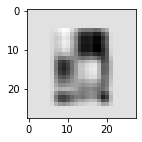

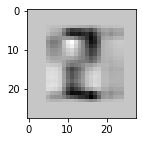

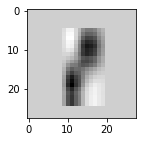

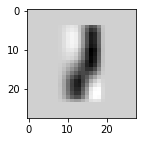

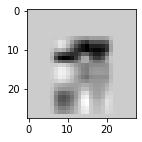

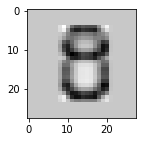

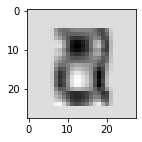

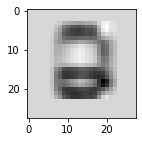

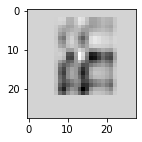

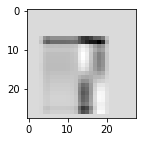

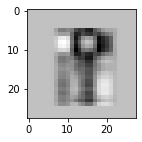

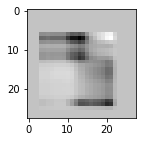

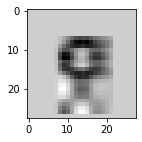

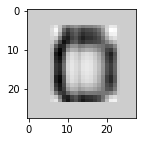

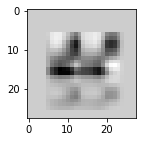

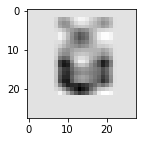

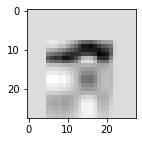

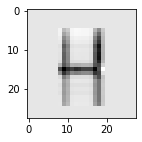

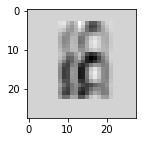

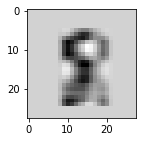

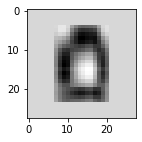

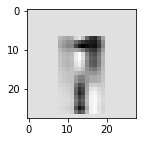

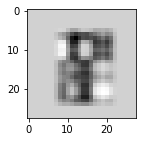

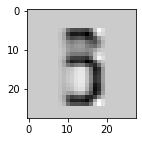

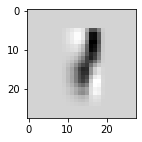

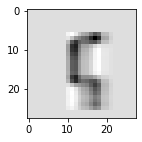

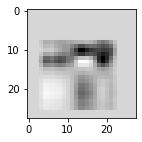

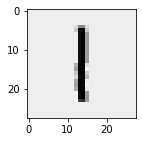

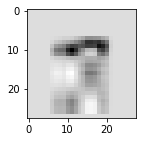

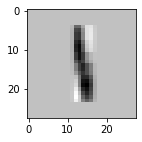

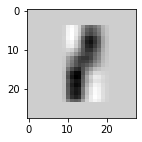

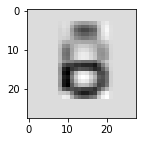

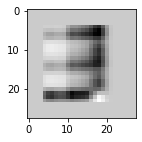

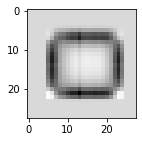

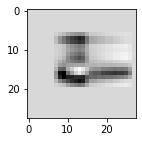

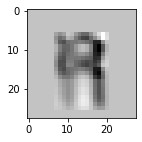

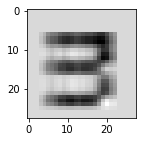

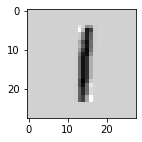

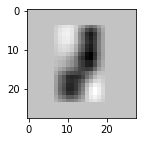

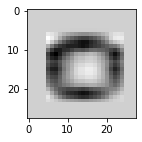

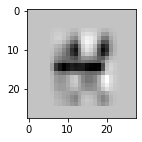

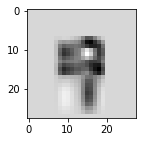

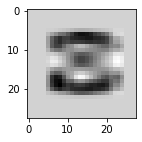

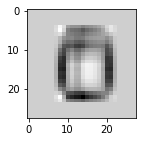

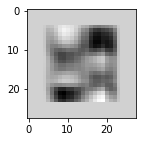

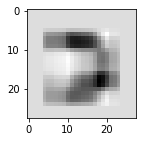

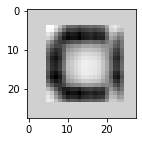

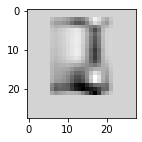

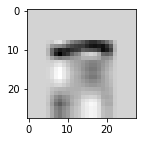

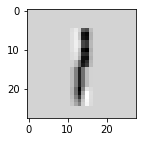

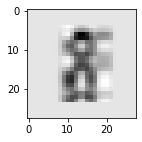

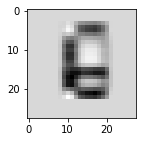

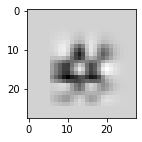

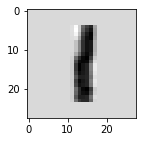

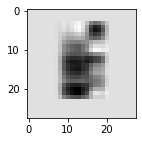

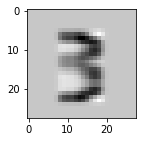

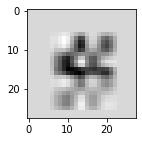

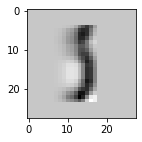

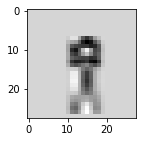

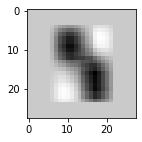

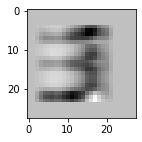

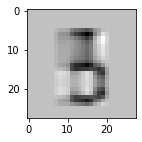

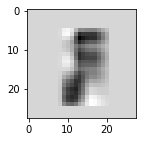

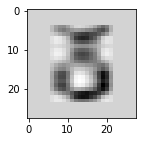

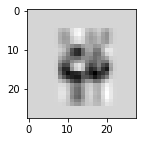

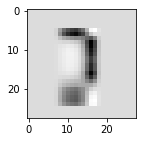

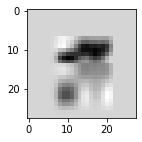

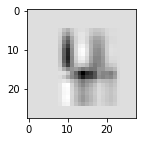

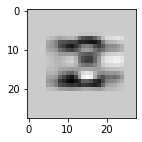

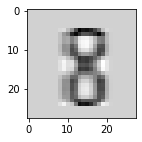

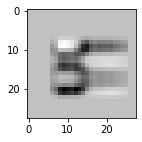

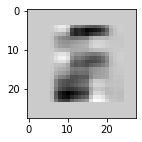

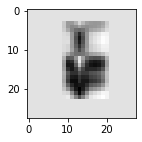

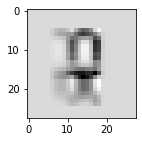

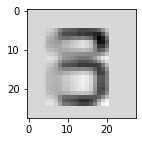

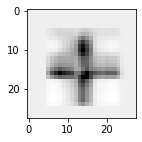

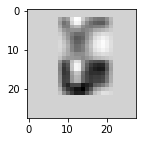

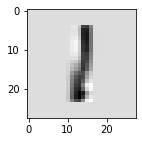

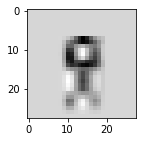

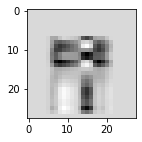

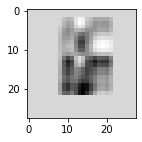

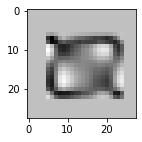

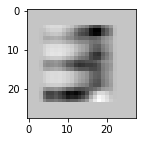

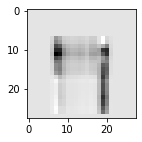

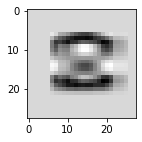

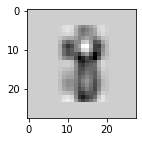

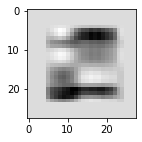

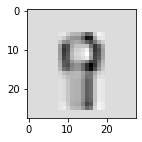

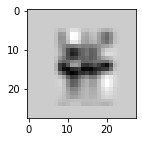

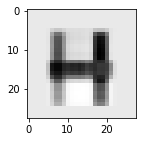

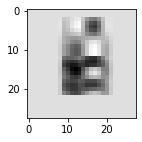

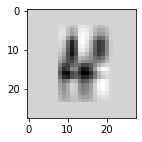

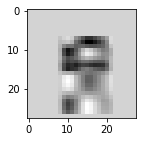

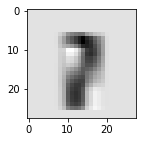

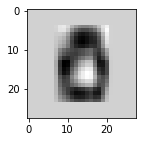

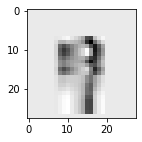

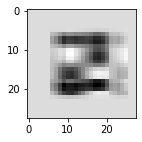

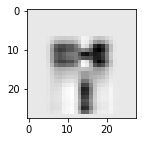

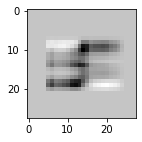

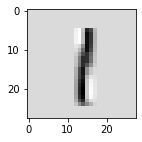

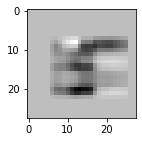

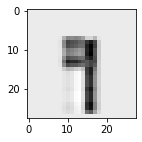

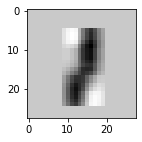

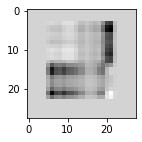

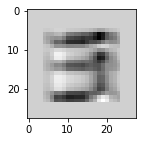

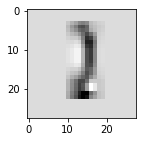

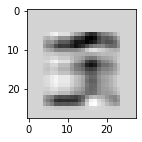

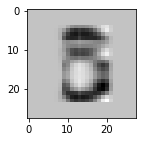

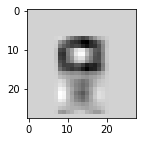

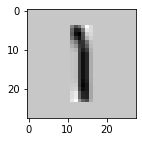

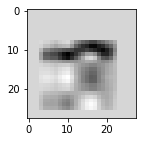

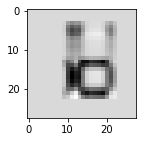

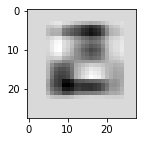

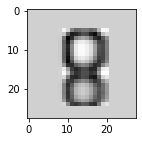

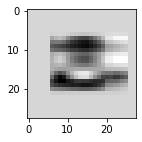

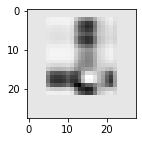

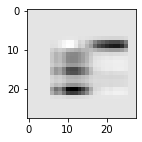

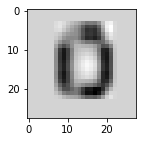

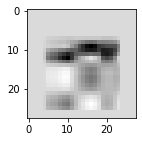

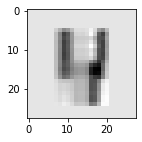

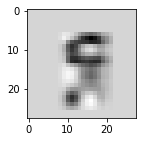

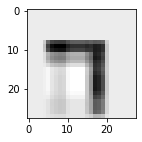

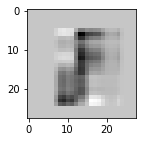

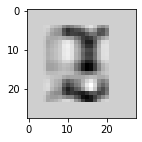

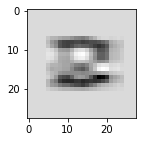

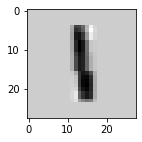

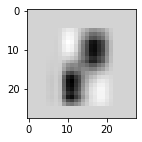

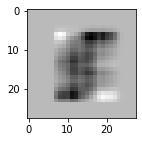

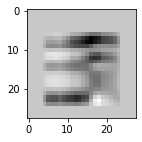

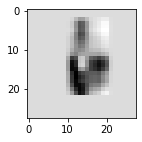

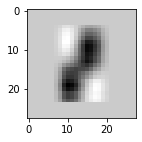

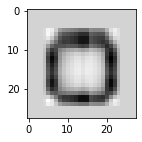

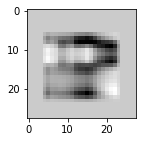

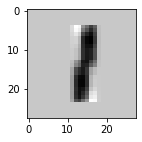

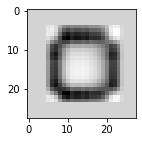

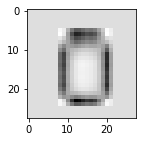

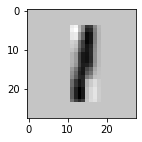

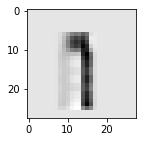

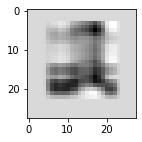

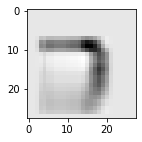

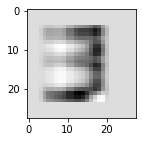

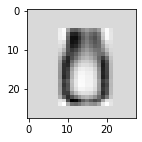

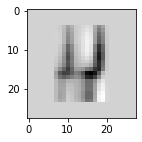

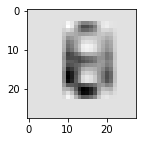

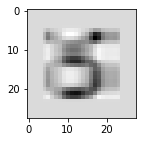

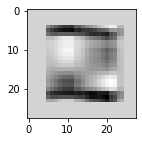

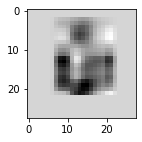

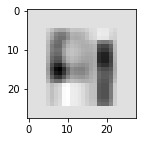

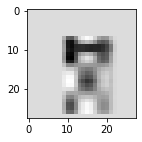

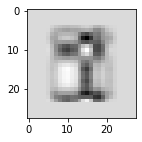

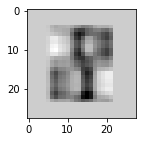

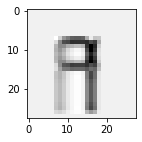

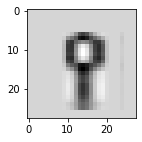

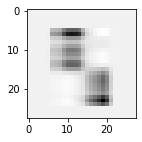

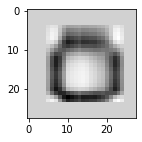

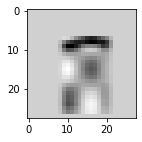

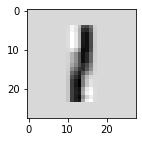

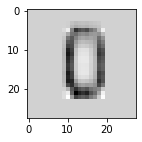

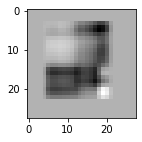

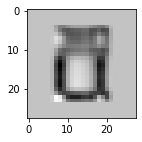

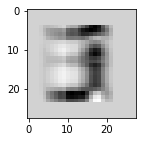

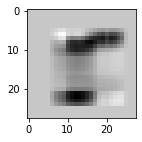

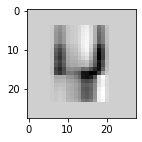

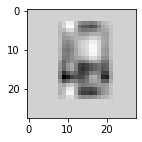

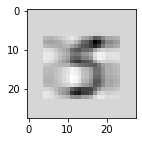

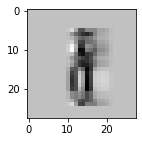

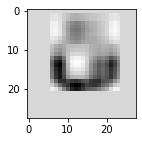

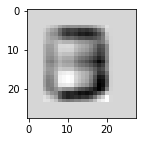

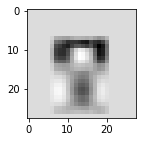

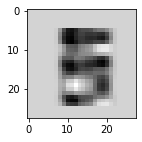

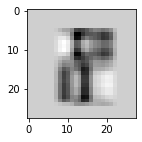

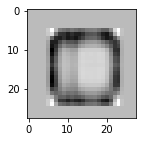

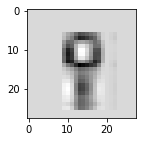

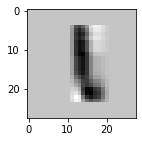

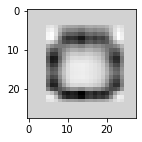

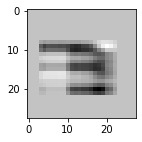

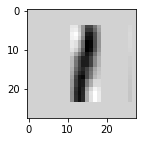

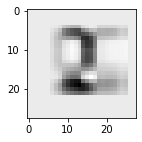

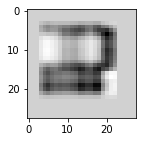

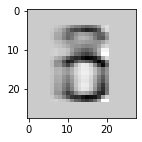

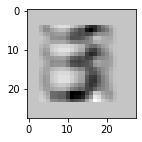

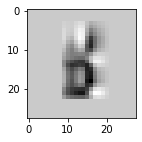

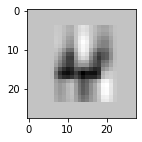

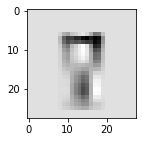

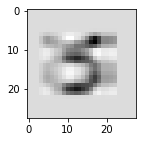

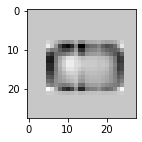

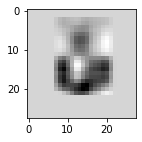

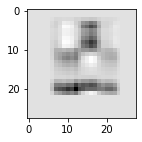

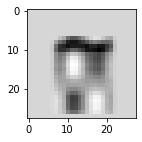

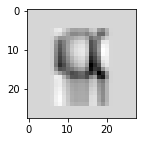

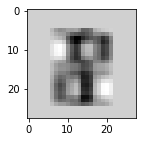

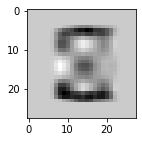

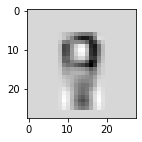

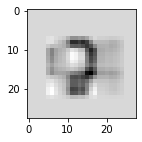

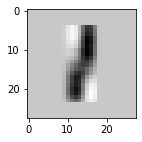

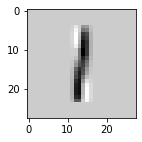

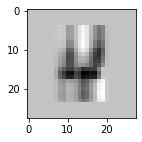

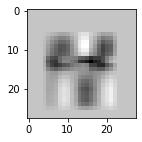

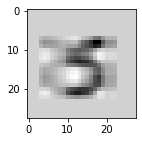

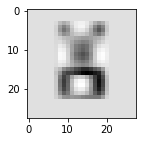

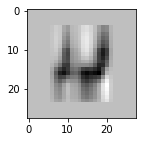

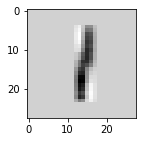

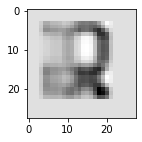

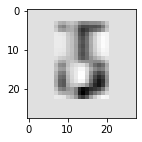

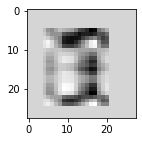

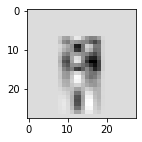

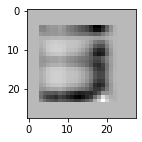

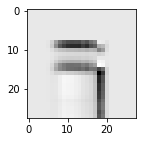

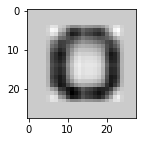

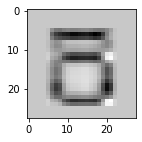

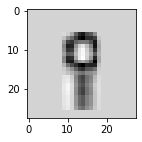

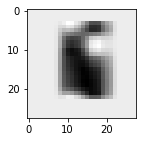

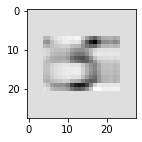

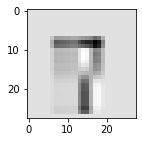

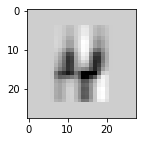

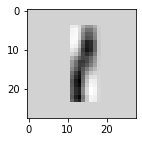

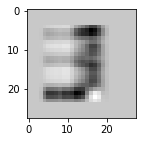

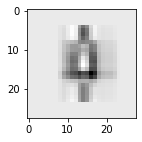

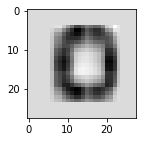

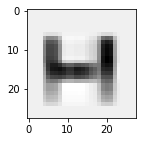

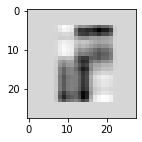

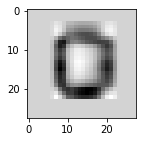

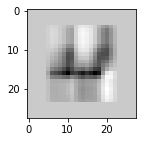

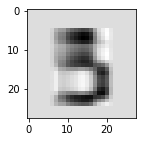

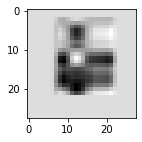

In [14]:
#compressing multiple images from a datset
def svd_on_dataset(comp):
    i=0
    plt.figure(figsize=(2, 2))
    while i<300:
        C=data[i,:,:,0]
        U, D, Vt = np.linalg.svd(C)
        cmpimg = np.matrix(U[:, :comp]) * np.diag(D[:comp]) * np.matrix(Vt[:comp,:])
        plt.figure(figsize=(2, 2))
        plt.imshow(cmpimg,cmap='gray_r')
        plt.show()
        i=i+1
        
       
svd_on_dataset(2)#where 2 are the number of components and for differnet value of components we can change it in the function